In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120, colors = 'kelly')

import sys
sys.path.append("../utils/")
import histogram as mpy_histogram
import simulate as mpy_simulate
import plot_functions as mpy_plotfn

from nnwmf.optimize import NNMFW

In [2]:
#| code-fold: false

ntrait = 4 # categories / class
ngwas  = 500 # N
nsnp   = 1000 # P
nfctr  = 40 # K

In [3]:
Y, Y_true, L, F, mean, noise_var, sample_indices = mpy_simulate.simulate(ngwas, nsnp, ntrait, nfctr, std = 0.5, do_shift_mean = False)
Y_cent = mpy_simulate.do_standardize(Y, scale = False)
Y_std  = mpy_simulate.do_standardize(Y)

In [4]:
nnm = NNMFW(show_progress = True, svd_max_iter = 50, debug = True)
nnm.fit(Y_cent, 40.0)

2023-07-19 14:52:04,930 | nnwmf.optimize.frankwolfe                | INFO    | Iteration 0. Step size 1.000. Duality Gap 2821.04


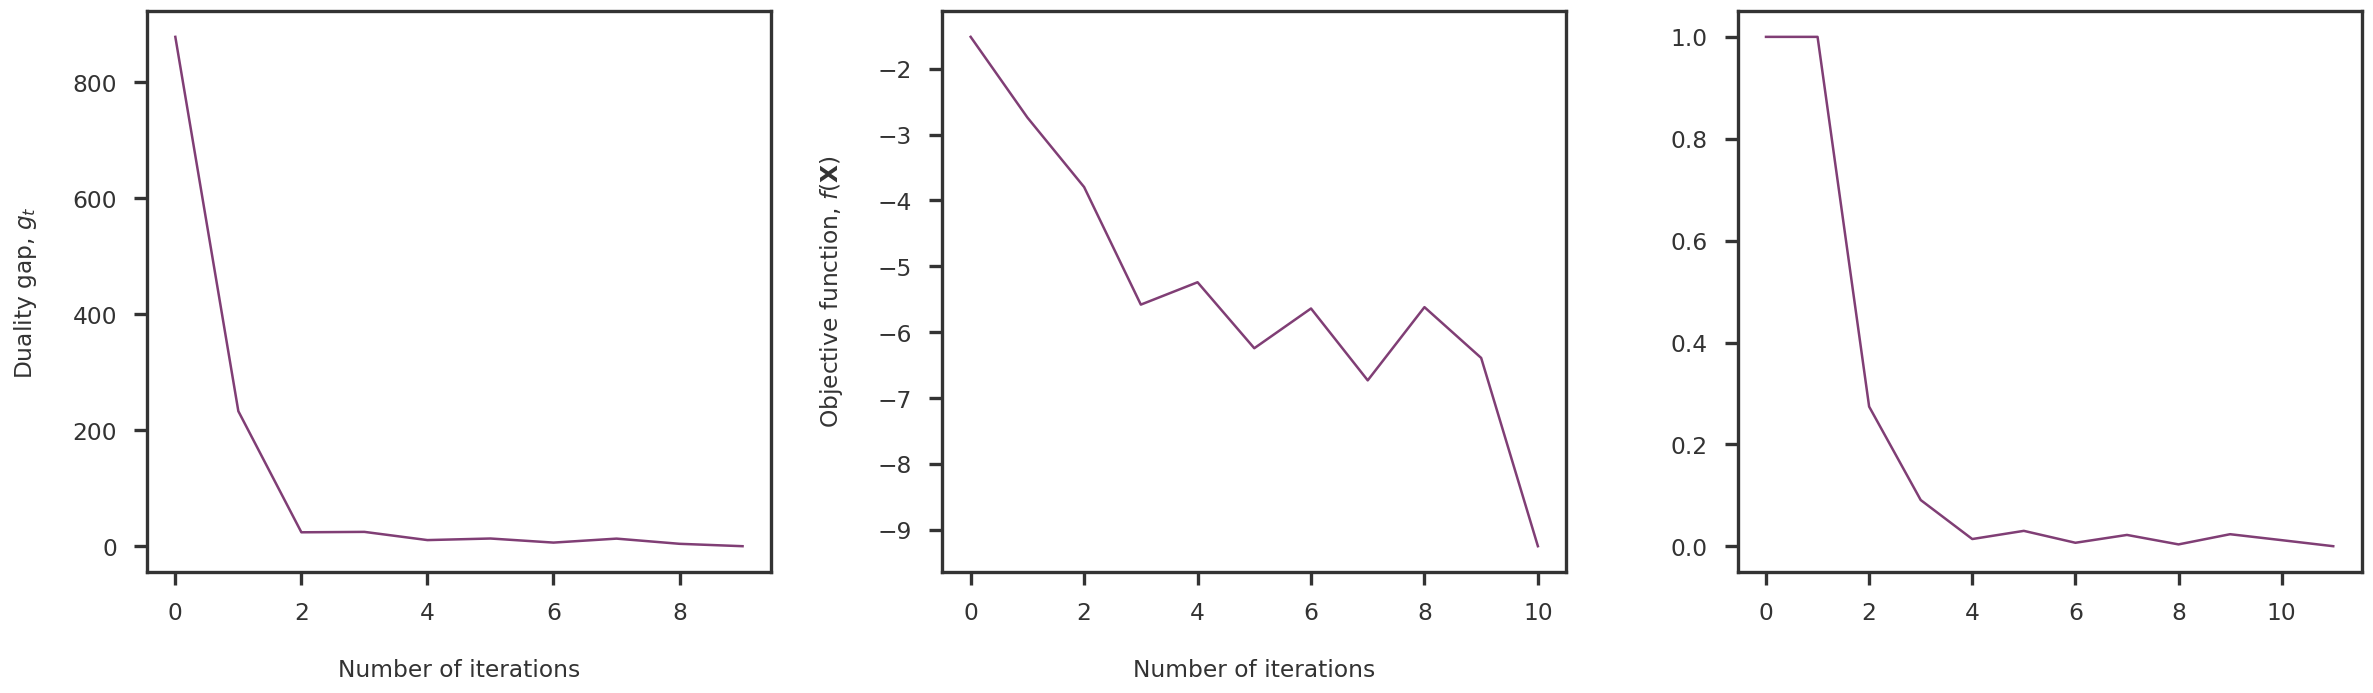

In [9]:
fig = plt.figure(figsize = (20, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

kp = len(nnm._st_list)
fx_arr = np.array(nnm._fx_list)
fx_rel_diff_log10 = np.log10(np.abs(np.diff(fx_arr) / fx_arr[1:]))

ax1.plot(np.arange(kp - 2), nnm._dg_list[2:kp])
# ax2.plot(np.arange(kp - 1), np.log10(fx_list[1:kp]))
ax2.plot(np.arange(kp - 1), fx_rel_diff_log10)
ax3.plot(np.arange(kp), nnm._st_list)

ax1.set_xlabel("Number of iterations")
ax2.set_xlabel("Number of iterations")
ax1.set_ylabel(r"Duality gap, $g_t$")
ax2.set_ylabel(r"Objective function, $f(\mathbf{X})$")
fig.tight_layout(w_pad = 2.0)
plt.show()

In [10]:
U, S, Vt = np.linalg.svd(mpy_simulate.do_standardize(nnm._X, scale = False), full_matrices=False)

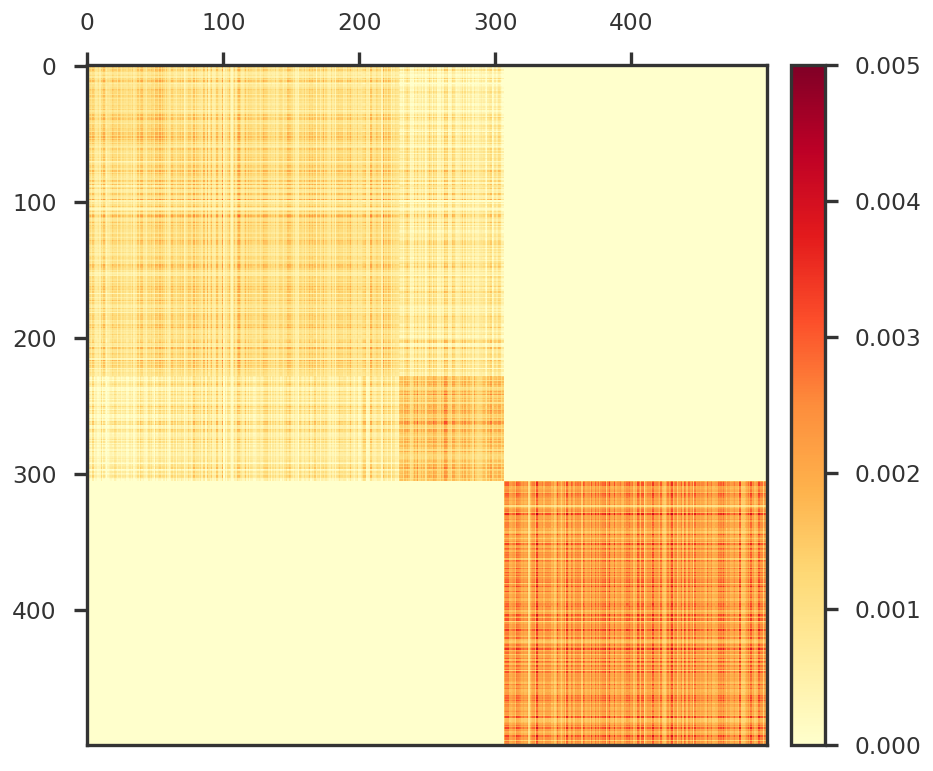

In [24]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

mpy_plotfn.plot_covariance_heatmap(ax1, nnm._X, vmax = 0.005)

plt.tight_layout()
plt.show()

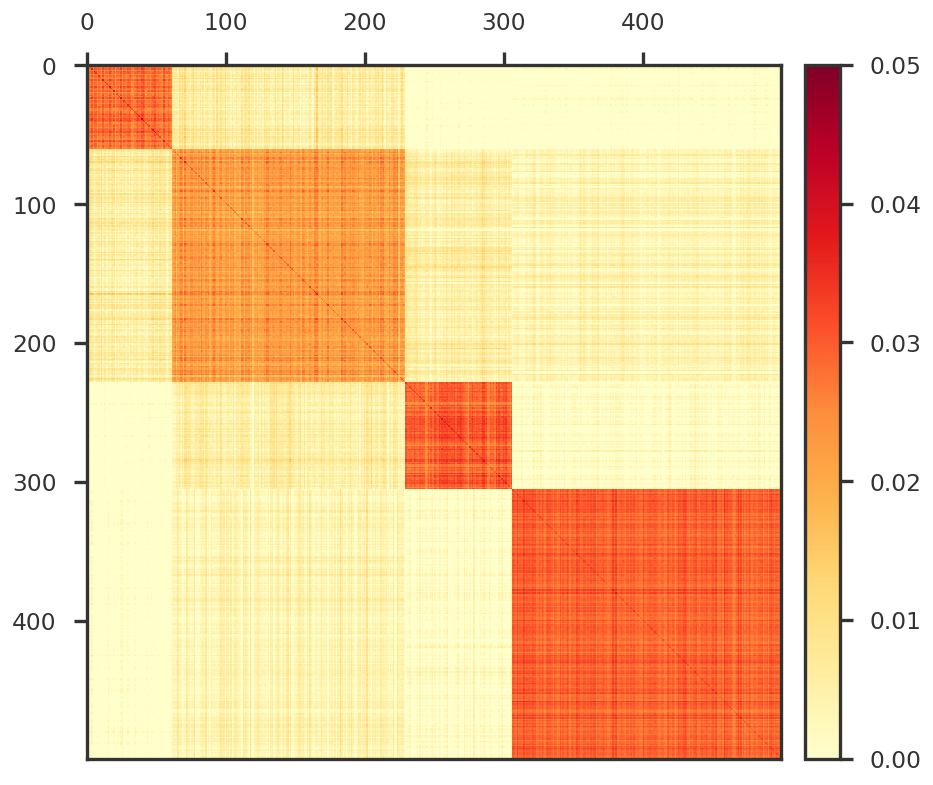

In [20]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

mpy_plotfn.plot_covariance_heatmap(ax1, Y_true, vmax = 0.05)

plt.tight_layout()
plt.show()

In [25]:
Y_true_cent = mpy_simulate.do_standardize(Y_true, scale = False)

In [26]:
def psnr(original, recovered):
    n, p = original.shape
    maxsig2 = np.square(np.max(original) - np.min(original))
    mse = np.sum(np.square(recovered - original)) / (n * p)
    res = 10 * np.log10(maxsig2 / mse)
    return res

In [27]:
psnr(Y_true_cent, nnm._X)

22.51250583747644

In [28]:
psnr(Y_true_cent, Y_cent)

10.036223079559763